In [62]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# `scipy.optimize.curve_fit` 的用法详解

`scipy.optimize.curve_fit` 是 Python 中 SciPy 库的一个重要函数，主要用于拟合一组数据到指定的函数模型。它通过最小化预测值与实际观测值之间的差异（通常是平方和）来找到最佳拟合参数。

函数基本结构

`curve_fit` 的基本调用形式如下：

```python
scipy.optimize.curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, bounds=(-np.inf, np.inf), method=None)
```
参数说明:

- f: 模型函数，接受独立变量和待估计参数作为输入，返回依赖变量（预测值）。
- xdata: 独立变量数据。
- ydata: 依赖变量数据（观察到或实际测得的值）。
- p0: 初始猜测参数。如果未提供，则默认所有初始猜测为 1。
- sigma: 每个 ydata 点的噪声级别或不确定性（标准偏差），长度需与 ydata 相同，且内容必须大于零。
- absolute_sigma: 如果为 True，则 sigma 被认为是直接给定的；如果为 False（默认），则只对相对权重进行调整。
- bounds: 限制拟合参数的取值范围。通过设置参数的上下限，可以确保优化过程中的参数值不会超出预期范围，从而避免不合理的拟合结果。
- method: 用于指定优化算法的选择。通过选择不同的优化方法，可以影响拟合过程的效率和结果，特别是在处理复杂或大规模数据时。

    可用的优化方法
    - 'lm': Levenberg-Marquardt 算法（默认方法）。适用于无约束问题，通常在处理小型数据集时表现良好。
    - 'trf': Trust Region Reflective 方法。适用于有界约束的问题，尤其是在参数有明确上下限时更为有效。
    - 'dogbox': 另一种适用于有界约束的方法，通常在参数较多或问题较复杂时表现更好。


该函数返回两个对象：

- popt: 最优参数值的数组。
- pcov: 参数协方差矩阵，用于估计拟合参数的不确定性

## 示例1

In [63]:
# 定义模型函数
def func(x, a, b, c):
    return a * x ** 2 + b * x + c

In [64]:
# 生成模拟数据
xdata = np.linspace(-10, 10, 100)
y = func(xdata, 3, -2, 1)
np.random.seed(0)  # 设置随机种子以确保结果可复现
y_noise = y + 0.5 * np.random.normal(size=xdata.size)

In [65]:
# 使用 curve_fit 进行拟合
popt, pcov = curve_fit(func, xdata, y_noise)
popt, pcov

(array([ 3.006475  , -2.00743317,  0.80971046]),
 array([[ 2.37756274e-06, -1.01181421e-12, -8.08531516e-05],
        [-1.01181421e-12,  6.46631192e-05,  6.12578547e-11],
        [-8.08531516e-05,  6.12578547e-11,  4.94853399e-03]]))

In [66]:
print("Optimal parameters are: a=%f, b=%f, c=%f" % (popt[0], popt[1], popt[2]))

Optimal parameters are: a=3.006475, b=-2.007433, c=0.809710


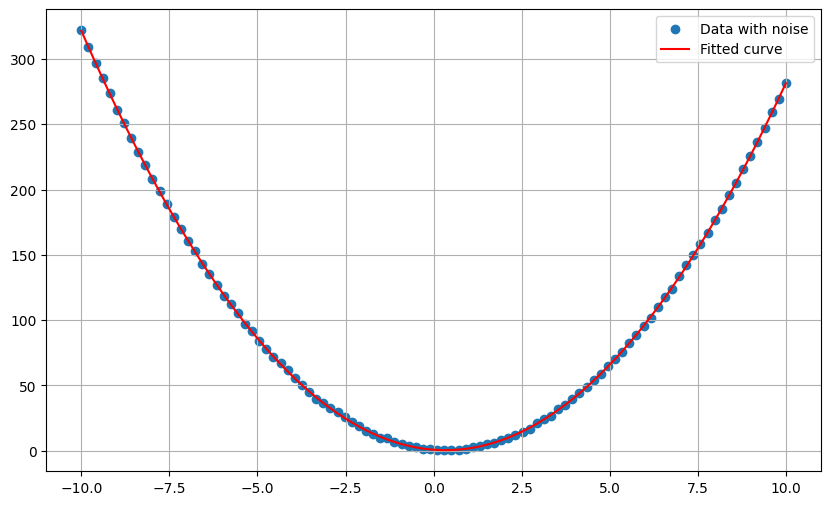

In [67]:
# 绘制结果
plt.figure(figsize=(10, 6))
plt.scatter(xdata, y_noise, label="Data with noise")
plt.plot(xdata, func(xdata, *popt), color="red", label="Fitted curve")
plt.legend()
plt.grid()
plt.show()

## 示例2

In [68]:
# 定义指数函数
def exp_func(x, a, b):
    return a * (1 - np.exp(-b * x))

In [69]:
# 定义对数函数
def log_func(x, a, b):
    return a * np.log2(b * x + 1)

In [70]:
# 多项式函数
def poly_func(x, a, b, c):
    return a * x ** 2 + b * x + c

### 指数函数

In [71]:
func = exp_func

In [72]:
# 模拟数据（多条曲线）
x_data = np.linspace(0, 1, 100)
curves = [
    func(x_data, a, 2.5) + np.random.normal(0, 0.02, len(x_data))
    for a in np.linspace(1, 3, 5)
]

In [73]:
# 全局拟合
params = []
for curve in curves:
    popt, popt_covariance = curve_fit(
        func, x_data, curve
    )
    print("popt:", popt)
    print("popt_covariance:", popt_covariance)
    params.append(popt)

popt: [0.98858454 2.57368558]
popt_covariance: [[ 7.00989373e-05 -4.01253143e-04]
 [-4.01253143e-04  2.63813804e-03]]
popt: [1.51157653 2.44822632]
popt_covariance: [[ 6.82034541e-05 -2.36720555e-04]
 [-2.36720555e-04  9.29200087e-04]]
popt: [2.0024766  2.47686054]
popt_covariance: [[ 6.44061672e-05 -1.71740794e-04]
 [-1.71740794e-04  5.19712168e-04]]
popt: [2.50205642 2.49465791]
popt_covariance: [[ 7.84782678e-05 -1.69307611e-04]
 [-1.69307611e-04  4.15422381e-04]]
popt: [2.99426951 2.49949602]
popt_covariance: [[ 7.50343251e-05 -1.35664929e-04]
 [-1.35664929e-04  2.79138196e-04]]


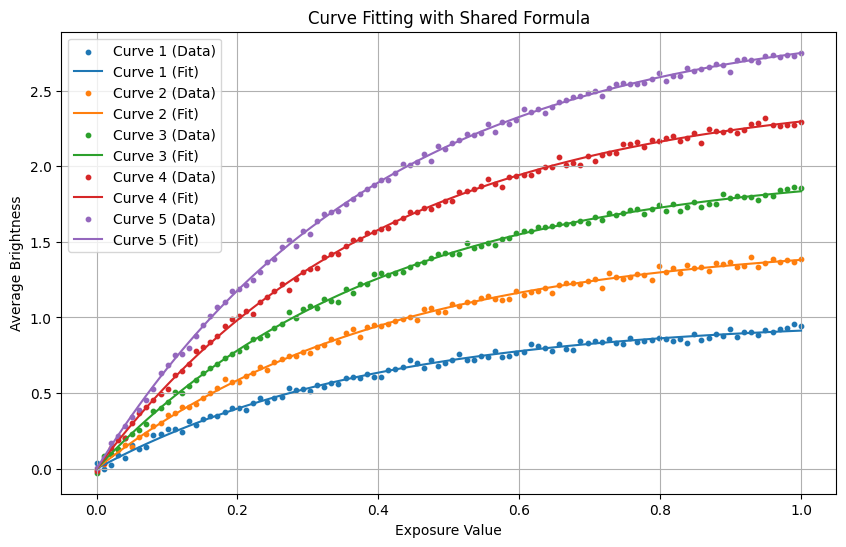

In [74]:
# 绘制原始数据和拟合结果
plt.figure(figsize=(10, 6))
for i, (curve, param) in enumerate(zip(curves, params)):
    plt.scatter(x_data, curve, label=f"Curve {i + 1} (Data)", s=10)
    plt.plot(x_data, func(x_data, *param), label=f"Curve {i + 1} (Fit)")
plt.legend()
plt.grid()
plt.xlabel("Exposure Value")
plt.ylabel("Average Brightness")
plt.title("Curve Fitting with Shared Formula")
plt.show()

### 对数函数

In [75]:
func = log_func

In [76]:
# 模拟数据（多条曲线）
x_data = np.linspace(0, 1, 100)
curves = [
    func(x_data, a, 2.5) + np.random.normal(0, 0.02, len(x_data))
    for a in np.linspace(1, 3, 5)
]

In [77]:
# 全局拟合
params = []
for curve in curves:
    popt, popt_covariance = curve_fit(
        func, x_data, curve
    )
    print("popt:", popt)
    print("popt_covariance:", popt_covariance)
    params.append(popt)

popt: [1.00515502 2.47428969]
popt_covariance: [[ 0.00030626 -0.00116858]
 [-0.00116858  0.00450176]]
popt: [1.49475121 2.50755774]
popt_covariance: [[ 0.00025843 -0.00067408]
 [-0.00067408  0.00177544]]
popt: [1.98526835 2.52606362]
popt_covariance: [[ 0.00024547 -0.00048649]
 [-0.00048649  0.00097361]]
popt: [2.4856117  2.52760331]
popt_covariance: [[ 0.00024979 -0.0003957 ]
 [-0.0003957   0.00063298]]
popt: [2.98679216 2.51663561]
popt_covariance: [[ 0.00023939 -0.00031389]
 [-0.00031389  0.00041561]]


C:\Users\algorithm2\AppData\Local\Temp\ipykernel_107356\2170712173.py:3: RuntimeWarning: invalid value encountered in log2
  return a * np.log2(b * x + 1)


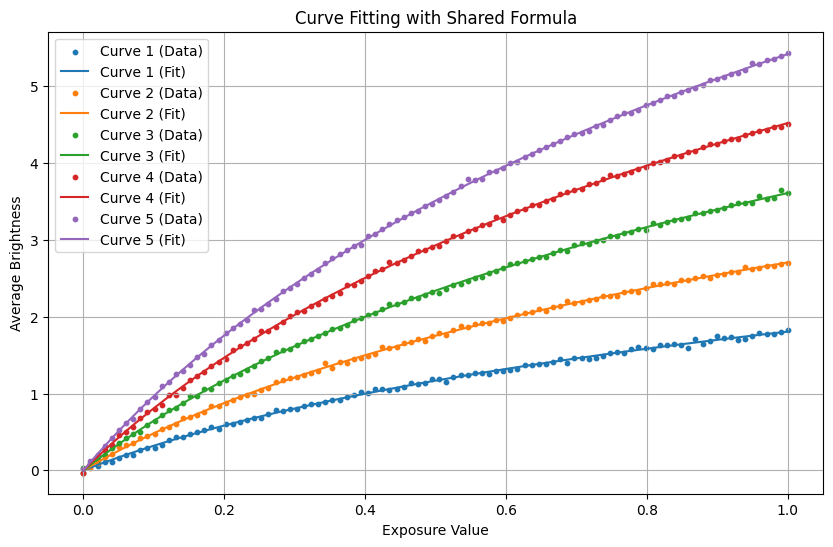

In [78]:
# 绘制原始数据和拟合结果
plt.figure(figsize=(10, 6))
for i, (curve, param) in enumerate(zip(curves, params)):
    plt.scatter(x_data, curve, label=f"Curve {i + 1} (Data)", s=10)
    plt.plot(x_data, func(x_data, *param), label=f"Curve {i + 1} (Fit)")
plt.legend()
plt.grid()
plt.xlabel("Exposure Value")
plt.ylabel("Average Brightness")
plt.title("Curve Fitting with Shared Formula")
plt.show()

### 对数函数

In [79]:
func = poly_func

In [80]:
# 模拟数据（多条曲线）
x_data = np.linspace(0, 1, 100)
curves = [
    func(x_data, a, 2.5, 1) + np.random.normal(0, 0.02, len(x_data))
    for a in np.linspace(1, 3, 5)
]

In [81]:
# 全局拟合
params = []
for curve in curves:
    popt, popt_covariance = curve_fit(
        func, x_data, curve
    )
    print("popt:", popt)
    print("popt_covariance:", popt_covariance)
    params.append(popt)

popt: [0.99438312 2.50426987 1.00364731]
popt_covariance: [[ 6.09040415e-04 -6.09040419e-04  1.00481417e-04]
 [-6.09040419e-04  6.50450948e-04 -1.21186680e-04]
 [ 1.00481417e-04 -1.21186680e-04  3.04509653e-05]]
popt: [1.4911651  2.50542162 1.00020449]
popt_covariance: [[ 7.73052745e-04 -7.73052737e-04  1.27540687e-04]
 [-7.73052737e-04  8.25614953e-04 -1.53821797e-04]
 [ 1.27540687e-04 -1.53821797e-04  3.86512955e-05]]
popt: [1.95882559 2.55324211 0.98723695]
popt_covariance: [[ 5.18043415e-04 -5.18043415e-04  8.54684426e-05]
 [-5.18043415e-04  5.53266772e-04 -1.03080121e-04]
 [ 8.54684426e-05 -1.03080121e-04  2.59012716e-05]]
popt: [2.4945087  2.50900744 0.9963932 ]
popt_covariance: [[ 7.60141412e-04 -7.60141413e-04  1.25410537e-04]
 [-7.60141413e-04  8.11825755e-04 -1.51252708e-04]
 [ 1.25410537e-04 -1.51252708e-04  3.80057520e-05]]
popt: [2.99738052 2.50572594 0.99917482]
popt_covariance: [[ 6.69728747e-04 -6.69728747e-04  1.10493968e-04]
 [-6.69728747e-04  7.15265655e-04 -1.332624

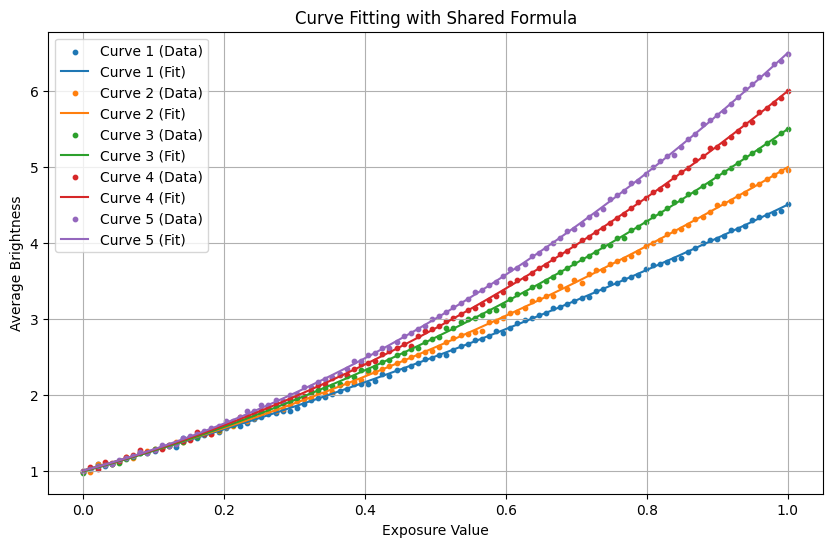

In [82]:
# 绘制原始数据和拟合结果
plt.figure(figsize=(10, 6))
for i, (curve, param) in enumerate(zip(curves, params)):
    plt.scatter(x_data, curve, label=f"Curve {i + 1} (Data)", s=10)
    plt.plot(x_data, func(x_data, *param), label=f"Curve {i + 1} (Fit)")
plt.legend()
plt.grid()
plt.xlabel("Exposure Value")
plt.ylabel("Average Brightness")
plt.title("Curve Fitting with Shared Formula")
plt.show()